## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [ ]:
# Your code here - remember to use markdown cells for comments as well!

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
kchouse = pd.read_csv('data/kc_house_data.csv')
kchouse.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
kchouse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
kc_new = kchouse.drop(['date', 'view', 'sqft_above', 'sqft_basement', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'], axis=1)
kc_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21597 non-null  int64  
 1   price        21597 non-null  float64
 2   bedrooms     21597 non-null  int64  
 3   bathrooms    21597 non-null  float64
 4   sqft_living  21597 non-null  int64  
 5   sqft_lot     21597 non-null  int64  
 6   floors       21597 non-null  float64
 7   waterfront   19221 non-null  float64
 8   condition    21597 non-null  int64  
 9   grade        21597 non-null  int64  
 10  yr_built     21597 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 1.8 MB


In [4]:
kc_new.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,3.409825,7.657915,1970.999676
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.650546,1.173200,29.375234
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,1900.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1951.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,7.000000,1975.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,4.000000,8.000000,1997.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,2015.000000


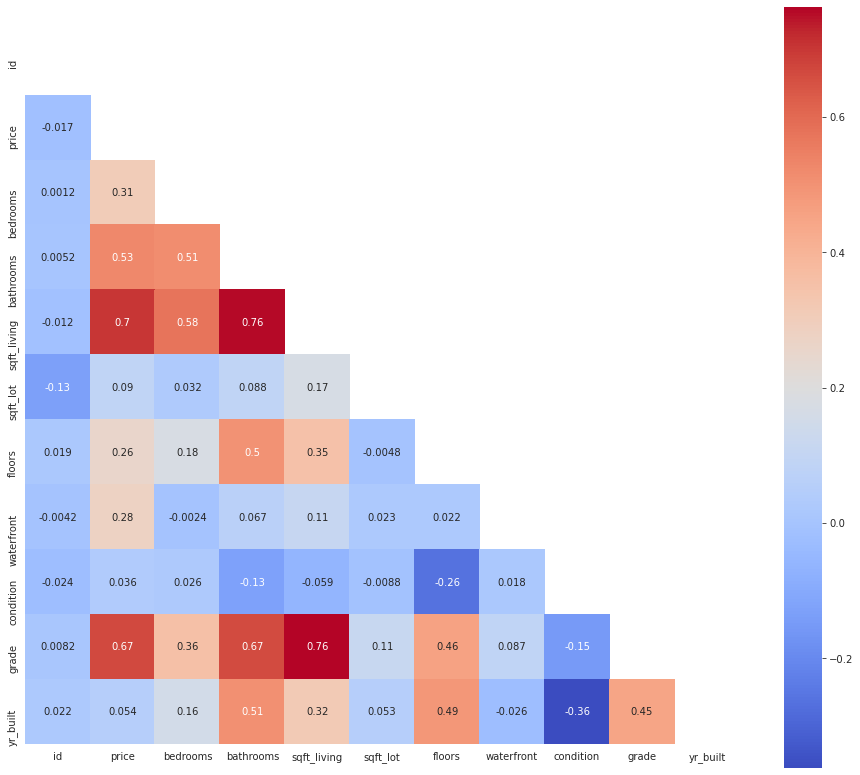

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = kc_new.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):

    f, ax = plt.subplots(figsize=(16, 14))

    ax = sns.heatmap(corr, mask=mask, square=True, annot = True, cmap = 'coolwarm')

In [16]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

df = kc_new.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))

# set index to pairs
df.set_index(['pairs'], inplace = True)

#d rop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df.drop_duplicates(inplace=True)

In [17]:
df[(df.cc>.75) & (df.cc <1)]

,cc
pairs,
"(grade, sqft_living)",0.762779
"(sqft_living, bathrooms)",0.755758


In [9]:
#decision which column to drop

In [27]:
train = kc_new
test = kc_new

X_train = train.drop("price", axis=1)
y_train = train["price"]

X_test = test.drop("price", axis=1)
y_test = test["price"]

X_train

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,7129300520,3,1.00,1180,5650,1.0,NaN,3,7,1955
1,6414100192,3,2.25,2570,7242,2.0,0.0,3,7,1951
2,5631500400,2,1.00,770,10000,1.0,0.0,3,6,1933
3,2487200875,4,3.00,1960,5000,1.0,0.0,5,7,1965
4,1954400510,3,2.00,1680,8080,1.0,0.0,3,8,1987
...,...,...,...,...,...,...,...,...,...,...
21592,263000018,3,2.50,1530,1131,3.0,0.0,3,8,2009
21593,6600060120,4,2.50,2310,5813,2.0,0.0,3,8,2014
21594,1523300141,2,0.75,1020,1350,2.0,0.0,3,7,2009
21595,291310100,3,2.50,1600,2388,2.0,NaN,3,8,2004


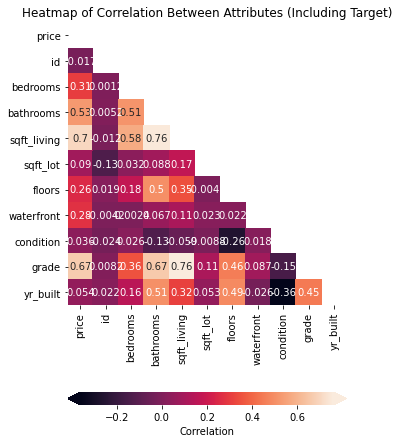

In [19]:

import seaborn as sns
import numpy as np

# Create a df with the target as the first column,
# then compute the correlation matrix
heatmap_data = pd.concat([y_train, X_train], axis=1)
corr = heatmap_data.corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(5, 8))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    # Specifies that we want labels, not just colors
    annot=True,
    # Customizes colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

In [20]:
from sklearn.linear_model import LinearRegression

baseline_model = LinearRegression()

In [32]:
from sklearn.model_selection import cross_validate, ShuffleSplit

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_train[['sqft_living']],
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.48774659364870426
Validation score: 0.5024006604207555


In [33]:
X_train_second_model = X_train.drop(['sqft_living'], axis = 1).copy()

In [34]:
second_model = LinearRegression()

second_model_scores = cross_validate(
    estimator=second_model,
    X=X_train_second_model,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      nan
Validation score: nan

Baseline Model
Train score:      0.48774659364870426
Validation score: 0.5024006604207555


C:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_base.py", line 505, in fit
    X, y = self._validate_data(X, y, accept_sparse=['csr', 'csc', 'coo'],
  File "C:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\validation.py", line 72, in inner_f
    return f(**kwargs)
  File "C:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\validation.py", line 795, in check_X_y
    X = check_arra

In [47]:
kc_new = kc_new.drop(columns = ['sqft_living'])

In [48]:
kc_new

,id,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,condition,grade,yr_built
0,7129300520,221900.0,3,1.00,5650,1.0,NaN,3,7,1955
1,6414100192,538000.0,3,2.25,7242,2.0,0.0,3,7,1951
2,5631500400,180000.0,2,1.00,10000,1.0,0.0,3,6,1933
3,2487200875,604000.0,4,3.00,5000,1.0,0.0,5,7,1965
4,1954400510,510000.0,3,2.00,8080,1.0,0.0,3,8,1987
...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1131,3.0,0.0,3,8,2009
21593,6600060120,400000.0,4,2.50,5813,2.0,0.0,3,8,2014
21594,1523300141,402101.0,2,0.75,1350,2.0,0.0,3,7,2009
21595,291310100,400000.0,3,2.50,2388,2.0,NaN,3,8,2004


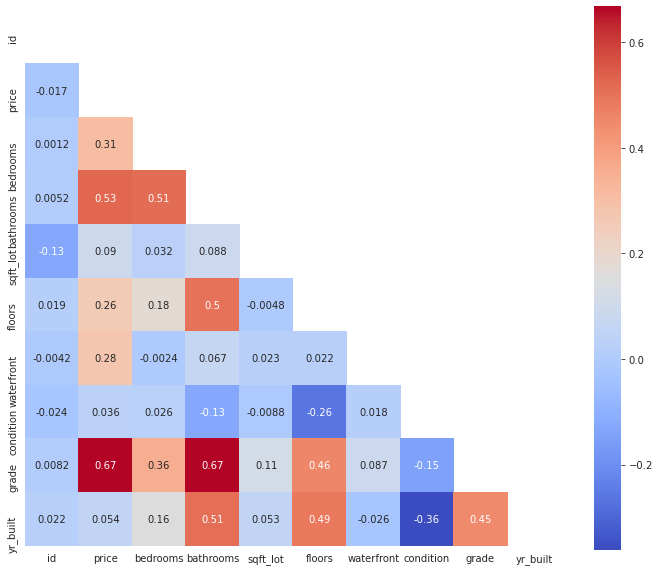

In [49]:
corr = kc_new.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):

    f, ax = plt.subplots(figsize=(12, 10))

    ax = sns.heatmap(corr, mask=mask, square=True, annot = True, cmap = 'coolwarm')

In [50]:
kc_new.isna().value_counts()

id     price  bedrooms  bathrooms  sqft_lot  floors  waterfront  condition  grade  yr_built
False  False  False     False      False     False   False       False      False  False       19221
                                                     True        False      False  False        2376
dtype: int64

In [18]:
# maybe make NAs their own category? 

array([[<AxesSubplot:xlabel='id', ylabel='id'>,
        <AxesSubplot:xlabel='price', ylabel='id'>,
        <AxesSubplot:xlabel='bedrooms', ylabel='id'>,
        <AxesSubplot:xlabel='bathrooms', ylabel='id'>,
        <AxesSubplot:xlabel='sqft_lot', ylabel='id'>,
        <AxesSubplot:xlabel='floors', ylabel='id'>,
        <AxesSubplot:xlabel='waterfront', ylabel='id'>,
        <AxesSubplot:xlabel='condition', ylabel='id'>,
        <AxesSubplot:xlabel='grade', ylabel='id'>,
        <AxesSubplot:xlabel='yr_built', ylabel='id'>],
       [<AxesSubplot:xlabel='id', ylabel='price'>,
        <AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='bedrooms', ylabel='price'>,
        <AxesSubplot:xlabel='bathrooms', ylabel='price'>,
        <AxesSubplot:xlabel='sqft_lot', ylabel='price'>,
        <AxesSubplot:xlabel='floors', ylabel='price'>,
        <AxesSubplot:xlabel='waterfront', ylabel='price'>,
        <AxesSubplot:xlabel='condition', ylabel='price'>,
        <AxesSubplot

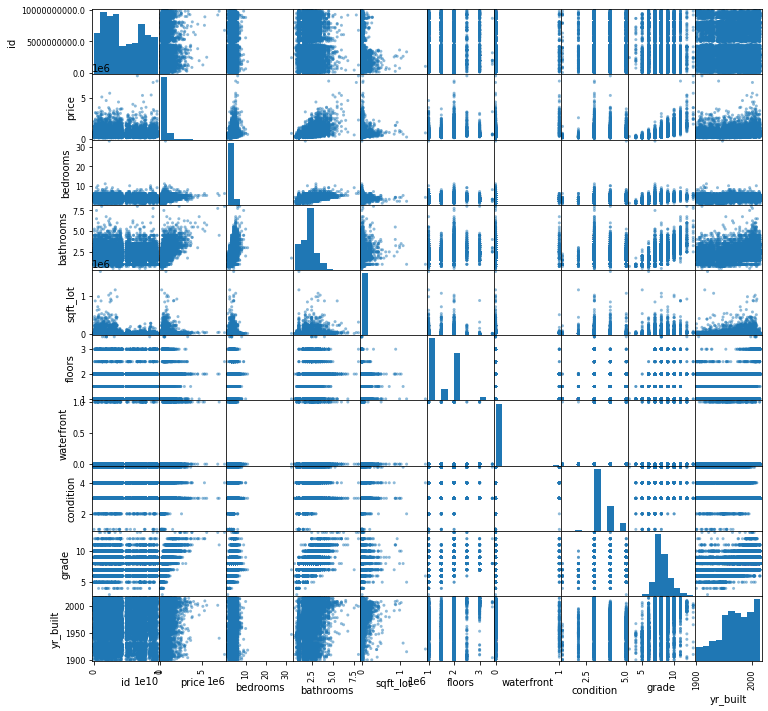

In [51]:
pd.plotting.scatter_matrix(kc_new, figsize=[12,12])

In [89]:
continuous = ['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'sqft_living']
categoricals = ['waterfront', 'condition', 'grade', 'yr_built', 'floors']
target = kc_new['price']
kccat = kc_new[categoricals]
kccon = kc_new[continuous]

In [84]:
kccat = kccat.set_index(kc_new['id'])
kccon = kccon.set_index(kc_new['id'])

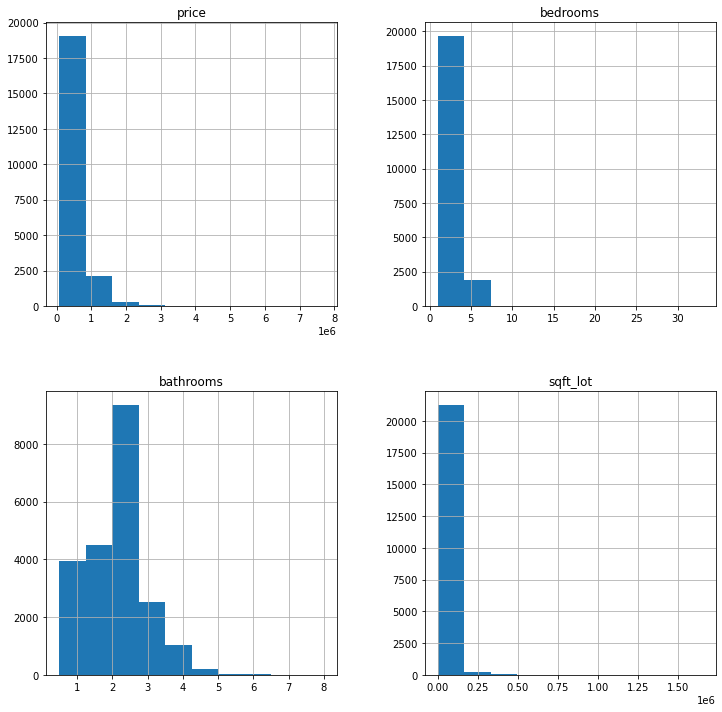

In [99]:
kccon[['price', 'bedrooms', 'bathrooms', 'sqft_lot']].hist(figsize = [12,12]);

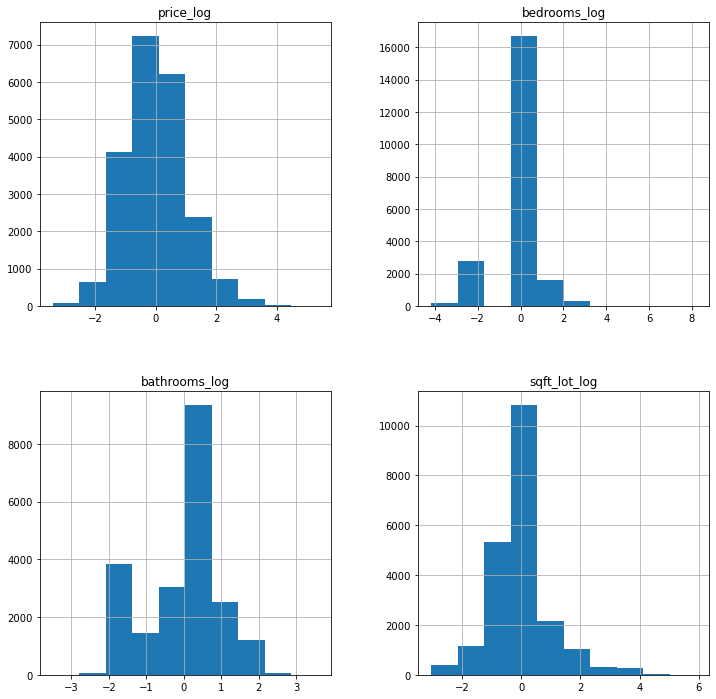

In [101]:
kc_log_norm[['price_log', 'bedrooms_log', 'bathrooms_log', 'sqft_lot_log']].hist(figsize = [12,12]);

In [78]:
kccat['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [79]:
kccat['waterfront'].isna().value_counts()

False    19221
True      2376
Name: waterfront, dtype: int64

In [80]:
kccat['condition'].value_counts()

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

In [81]:
kccat['grade'].value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

In [82]:
kccat['yr_built'].value_counts()

2014    559
2006    453
2005    450
2004    433
2003    420
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

In [91]:
from statsmodels.formula.api import ols
outcome = 'price'
x_cols = ['bedrooms', 'bathrooms', 'sqft_lot']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=kc_new).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     2806.
Date:                Wed, 16 Feb 2022   Prob (F-statistic):               0.00
Time:                        17:59:29   Log-Likelihood:            -3.0384e+05
No. Observations:               21597   AIC:                         6.077e+05
Df Residuals:                   21593   BIC:                         6.077e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -3.64e+04   8304.224     -4.384      0.000   -5.27e+04   -2.01e+04
bedrooms    2.092e+04   2670.094      7.834      0.000    1.57e+04    2.62e+04
bathrooms   2.364e+05   3227.258     73.251      0.000     2.3e+05    2.43e+05
sqft_lot       0.3942      0.051      7.667      0.000       0.293       0.495
==============================================================================
Omnibus:                    17398.214   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           914685.882
Skew:                           3.490   Prob(JB):                         0.00
Kurtosis:                      34.109   Cond. No.                     1.77e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [114]:
log_names = [f'{column}_log' for column in kccon.columns]

kc_log = np.log(kccon)
kc_log.columns = log_names

# normalize (subract mean and divide by std)

def standardize(feature):
    return (feature - feature.mean()) / feature.std()

kc_log_norm = kc_log.apply(standardize)

In [115]:
outcome = 'price_log'
x_cols = ['bedrooms_log', 'bathrooms_log', 'sqft_lot_log']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=kc_log_norm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     2846.
Date:                Wed, 16 Feb 2022   Prob (F-statistic):               0.00
Time:                        18:22:19   Log-Likelihood:                -27047.
No. Observations:               21597   AIC:                         5.410e+04
Df Residuals:                   21593   BIC:                         5.413e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.343e-15      0.006   2.33e-13      1.000      -0.011       0.011
bedrooms_log      0.0733      0.007     10.587      0.000       0.060       0.087
bathrooms_log     0.4740      0.007     69.546      0.000       0.461       0.487
sqft_lot_log      0.0837      0.006     14.236      0.000       0.072       0.095
==============================================================================
Omnibus:                      306.129   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              318.965
Skew:                           0.297   Prob(JB):                     5.46e-70
Kurtosis:                       3.051   Cond. No.                         1.88
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

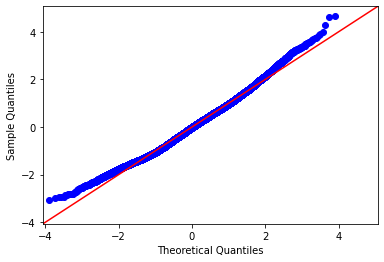

In [116]:
import statsmodels.api as sm
import scipy.stats as stats

fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

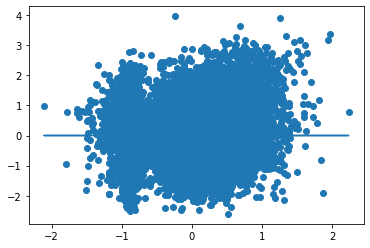

In [117]:
plt.scatter(model.predict(kc_log_norm[x_cols]), model.resid)
plt.plot(model.predict(kc_log_norm[x_cols]), [0 for i in range(len(kc_log_norm))])

In [ ]:
train = pd.read_csv("data/lego_train.csv")
test = pd.read_csv("data/lego_test.csv")

X_train = train.drop("list_price", axis=1)
y_train = train["list_price"]

X_test = test.drop("list_price", axis=1)
y_test = test["list_price"]

X_train